# Dataset Iterators

The dataset is logged in 3 seperated sources:
1. Android Phone(s)
    a. CSV
    b. Video File
2. Panda (CAN BUS Data)
    a. CSV file only
3. DVR Video
    a. Multiple Video Streams
    b. Log files

The `dataset_iterators.py` file provides classes to easily access the recorded data as panda's `DataFrame` objects

In [2]:
from matplotlib import pyplot as plt 
import binascii
import cv2

from dataset_helper import dataset_iterators

## Pandas CSV Iterator

The raw CAN data comes in with the format `timestamp,CAN_ID,MESSAGE` and is logges as such for the sake of maintaining high speed data logging. The `PandaDatasetIterator` creates and caches a new CSV of the format `timestamp,ID1,ID2,...,IDn` which is easier to use for plotting.

In [4]:
panda_iter = dataset_iterators.PandaDatasetIterator("panda_logs/PANDA_2022-05-31_10:25:56.624274.csv")
panda_iter

Init path: panda_logs/PANDA_2022-05-31_10:25:56.624274.csv


----------------------------------------------------
PandaDatasetIterator('panda_logs/PANDA_2022-05-31_10:25:56.624274.csv')
----------------------------------------------------
self.fps:        	386.07107569895743
self.frame_count:	343230
self.start_time_csv:	2022-05-31 10:25:56.630635
self.end_time_csv:	2022-05-31 10:40:45.663825
self.duration:    	0:14:49.033190
----------------------------------------------------

In [5]:
panda_iter.csv_dat

,timestamp,310,314,319,344,380,208,476,356,660,...,464,800,804,773,884,983,1029,1036,1108,1729
0,1.653973e+09,"(51902, ""b'1000000b00000020'"", 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.653973e+09,"(1361, ""b'1000000b00000011'"", 0)","(62021, ""b'0000800000000002'"", 0)","(62145, ""b'006500d30000000a'"", 0)","(62265, ""b'000000000000000a'"", 0)","(62389, ""b'000003340000000a'"", 0)","(62514, ""b'0000000000001a'"", 0)","(62629, ""b'02033402'"", 0)","(63827, ""b'0400403480000033'"", 0)","(54011, ""b'0016400243680025'"", 0)",...,"(58341, ""b'000000000000000a'"", 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.653973e+09,"(11358, ""b'1000000b0000003f'"", 0)","(11480, ""b'000080000000003f'"", 0)","(11603, ""b'006500d300000037'"", 0)","(11723, ""b'0000000000000037'"", 0)","(11848, ""b'0000033400000037'"", 0)","(12444, ""b'0000000000000b'"", 0)","(7091, ""b'02033411'"", 0)","(8837, ""b'0400403480000015'"", 0)","(8994, ""b'0016400243680034'"", 0)",...,"(2803, ""b'000000000000000a'"", 0)","(7175, ""b'000012'"", 0)","(7252, ""b'6a49041300000019'"", 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.653973e+09,"(21355, ""b'1000000b00000011'"", 0)","(21476, ""b'0000800000000011'"", 0)","(21598, ""b'006500d300000019'"", 0)","(21719, ""b'0000000000000019'"", 0)","(21844, ""b'0000033400000019'"", 0)","(22427, ""b'00000000000029'"", 0)","(17087, ""b'02033420'"", 0)","(18391, ""b'0400403481000032'"", 0)","(8994, ""b'0016400243680034'"", 0)",...,"(12816, ""b'000000000000000a'"", 0)","(7175, ""b'000012'"", 0)","(7252, ""b'6a49041300000019'"", 0)","(20949, ""b'8017'"", 0)",NaN,NaN,NaN,NaN,NaN,NaN
4,1.653973e+09,"(31352, ""b'1000000b0000003f'"", 0)","(31474, ""b'000080000000003f'"", 0)","(31597, ""b'006700d3fff60032'"", 0)","(31717, ""b'0000000000000037'"", 0)","(31842, ""b'0000033300000038'"", 0)","(27052, ""b'00000000000038'"", 0)","(26968, ""b'0203343f'"", 0)","(28312, ""b'0400403480000015'"", 0)","(28469, ""b'0016400243680007'"", 0)",...,"(22796, ""b'000000000000000a'"", 0)","(7175, ""b'000012'"", 0)","(7252, ""b'6a49041300000019'"", 0)","(20949, ""b'8017'"", 0)","(28625, ""b'00000000000037'"", 0)",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343225,1.653974e+09,"(41989, ""b'1000000e0000001e'"", 0)","(42110, ""b'0000800000000011'"", 0)","(37237, ""b'0020008dff24000a'"", 0)","(37357, ""b'000000000000d805'"", 0)","(37480, ""b'0000060701000006'"", 0)","(37798, ""b'0000000000000b'"", 0)","(37678, ""b'0206072d'"", 0)","(38377, ""b'0000402b8e000024'"", 0)","(33523, ""b'00164002436d003f'"", 0)",...,"(38173, ""b'000000000000000a'"", 0)","(17775, ""b'000003'"", 0)","(17969, ""b'845513fc0000000a'"", 0)","(31811, ""b'003d'"", 0)","(33680, ""b'00000000000019'"", 0)","(18215, ""b'b000000000000024'"", 0)","(49203, ""b'000000000000002d'"", 0)","(33755, ""b'0000000004000013'"", 0)","(34242, ""b'64dd02753015'"", 0)","(34341, ""b'05'"", 0)"
343226,1.653974e+09,"(41989, ""b'1000000e0000001e'"", 0)","(42110, ""b'0000800000000011'"", 0)","(42232, ""b'0020008d0000001d'"", 0)","(42469, ""b'000000000000d814'"", 0)","(42593, ""b'0000060701000015'"", 0)","(42354, ""b'0000000000001a'"", 0)","(37678, ""b'0206072d'"", 0)","(38377, ""b'0000402b8e000024'"", 0)","(33523, ""b'00164002436d003f'"", 0)",...,"(38173, ""b'000000000000000a'"", 0)","(17775, ""b'000003'"", 0)","(17969, ""b'845513fc0000000a'"", 0)","(31811, ""b'003d'"", 0)","(33680, ""b'00000000000019'"", 0)","(18215, ""b'b000000000000024'"", 0)","(49203, ""b'000000000000002d'"", 0)","(33755, ""b'0000000004000013'"", 0)","(34242, ""b'64dd02753015'"", 0)","(34341, ""b'05'"", 0)"
343227,1.653974e+09,"(41989, ""b'1000000e0000001e'"", 0)","(42110, ""b'0000800000000011'"", 0)","(42232, ""b'0020008d0000001d'"", 0)","(42469, ""b'000000000000d814'"", 0)","(42593, ""b'0000060701000015'"", 0)","(42354, ""b'0000000000001a'"", 0)","(37678, ""b'0206072d'"", 0)","(43366, ""b'0000402b8e000033'"", 0)","(33523, ""b'00164002436d003f'"", 0)",...,"(3817

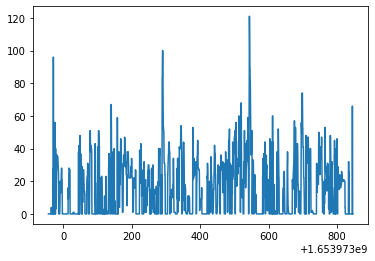

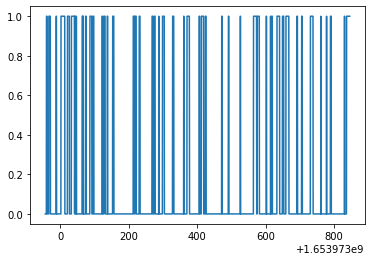

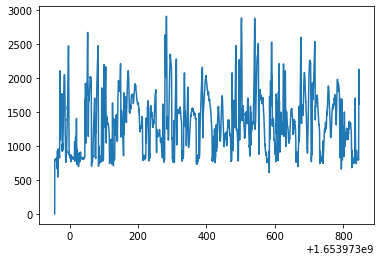

In [6]:
dat = {
    't':[],
    'b':[],
    'r':[],
    'sb':[],
    'ts':[]
}
throttle = 0
brake = 0
rpm = 0
seat_belt = 0

#for frame in panda_iter[::100]:
for frame_id in range(0, len(panda_iter), 100):
    frame = panda_iter[frame_id]

    if str(frame['314'])!='nan':
        hex_frame = binascii.unhexlify(eval(eval(frame['314'])[1]))
        throttle = hex_frame[1]

    if str(frame['773'])!='nan':
        hex_frame = binascii.unhexlify(eval(eval(frame['773'])[1]))
        seat_belt = hex_frame[0]>>7

    if str(frame['380'])!='nan':
        hex_frame = binascii.unhexlify(eval(eval(frame['380'])[1]))
        rpm = int.from_bytes(hex_frame[2:4], 'big') # * 15000 / 255.0
        brake = hex_frame[4] & 1

    if str(frame['344'])!='nan':
        hex_frame = binascii.unhexlify(eval(eval(frame['344'])[1]))
        transmission_speed = hex_frame[1] * 0.002759506 # m/s

    dat['t'].append(throttle)
    dat['b'].append(brake)
    dat['r'].append(rpm)
    dat['sb'].append(seat_belt)
    dat['ts'].append(frame["timestamp"])

plt.plot(dat['ts'], dat['t'])
plt.show()
plt.plot(dat['ts'], dat['b'])
plt.show()
plt.plot(dat['ts'], dat['r'])
plt.show()
#plt.plot(dat['ts'], dat['sb'])
#plt.show()

## Phone Data Iterator

The Android App saved the IMU and GPS data in csv format along with a video to accompany it. The video has a known duration, start time and a fixed frame rate. Using these, the `AndroidDatasetIterator` can generate a mapping from timestamp to video frame.

In [7]:
phone_iter = dataset_iterators.AndroidDatasetIterator()
phone_iter

Init path: dataset/1653972957447


----------------------------------------------------
AndroidDatasetIterator('dataset/1653972957447')
----------------------------------------------------
self.fps:        	29.982331563803903
self.frame_count:	26461
self.start_time_csv:	2022-05-31 10:25:59.353000
self.end_time_csv:	2022-05-31 10:40:43.058000
self.expected_duration:	0:14:43.705000
self.expected_fps:	29.94325029280133
----------------------------------------------------

In [8]:
phone_iter.csv_dat

,Timestamp,Longitude,Latitude,RotationV X,RotationV Y,RotationV Z,RotationV W,RotationV Acc,linear_acc_x,linear_acc_y,linear_acc_z,heading,speed
0,1653972959353,77.522784,12.909305,0.281122,-0.714472,0.277536,0.577472,0.0,0.021916,-0.020948,0.008253,39.0,0.00
1,1653972959454,77.522785,12.909305,0.280370,-0.713017,0.276290,0.580227,0.0,0.004384,0.027230,0.006771,39.0,0.17
2,1653972959554,77.522785,12.909305,0.279593,-0.715123,0.277164,0.577587,0.0,0.004384,0.027230,0.006771,39.0,0.17
3,1653972959654,77.522781,12.909304,0.279593,-0.715123,0.277164,0.577587,0.0,-0.008378,0.004565,-0.007143,39.0,0.00
4,1653972959754,77.522781,12.909304,0.280210,-0.714340,0.276714,0.578472,0.0,-0.008378,0.004565,-0.007143,39.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8803,1653973842659,77.532462,12.935323,-0.576088,-0.484446,-0.503971,0.423614,0.0,-0.004644,0.005296,-0.049796,190.0,0.00
8804,1653973842759,77.532462,12.935323,-0.576088,-0.484446,-0.503971,0.423614,0.0,-0.004644,0.005296,-0.049796,190.0,0.00
8805,1653973842861,77.532462,12.935323,-0.576088,-0.484446,-0.503971,0.423614,0.0,-0.004644,0.005296,-0.049796,190.0,0.00
8806,1653973842958,77.532462,12.935323,-0.576088,-0.484446,-0.503971,0.423614,0.0,-0.004644,0.005296,-0.049796,190.0,0.00


cap.set:  2707
Timestamp        1.653973e+12
Longitude        7.752097e+01
Latitude         1.291047e+01
RotationV X      5.008347e-01
RotationV Y     -5.653609e-01
RotationV Z      4.361722e-01
RotationV W      4.891682e-01
RotationV Acc    0.000000e+00
linear_acc_x     1.635809e-01
linear_acc_y    -1.578749e-01
linear_acc_z     3.873682e-02
heading          6.000000e+00
speed            6.400000e+00
Name: 1000, dtype: float64


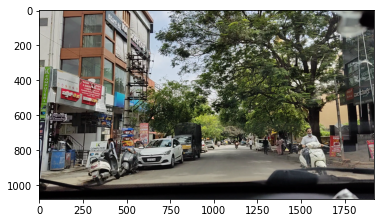

In [15]:
phone_data, phone_frame = phone_iter[1000]
print(phone_data)
phone_frame = cv2.cvtColor(phone_frame, cv2.COLOR_BGR2RGB)
plt.imshow(phone_frame)

## Panda Recorder

The Panda provides CAN frames from the vehicle upon request. The `PandaDatasetRecorder` class provides a wrapper to write said frames to disk

## DVR Recorder

The DVR provides a RSTP video stream. The `DVRDatasetRecorder` class provides a wrapper to write said video streams from multiple channels to disk simultaneously. It internally uses `ffmpeg` and python multiprocessing to acheive the same. It will internally launch N processes (plus the main process) to record the N channels.